# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<function matplotlib.pyplot.show(close=None, block=None)>

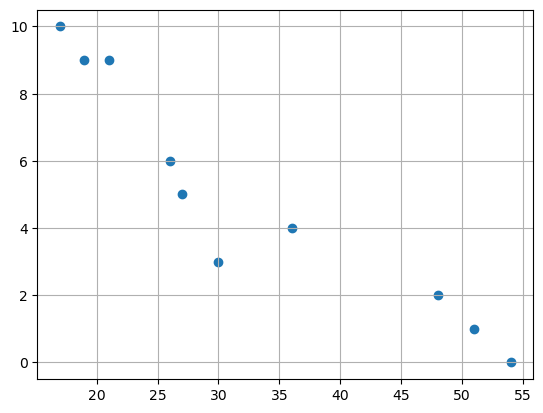

In [3]:
plt.figure
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.grid(True)
plt.show

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Yes, the older the student is the more on time they are

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
covariance = student_data['Age'].cov(student_data['Tardies'])

correlation = student_data['Age'].corr(student_data['Tardies'])

print(covariance)
print(correlation)

-45.56666666666667
-0.9391626886887122


Strong negative correlation confirming the previous impression of the chart
Covariance is large meaning flactuations of the values is large

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


model = smf.ols('Tardies ~ Age', data=student_data).fit()

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           5.57e-05
Time:                        02:00:33   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Plot your regression model on your scatter plot.

In [9]:
lm = LinearRegression()

lm.fit(X, y)
plt.figure
plt.scatter(student_data['Age'], student_data['Tardies'])

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = lm.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label='Regression Line')
plt.title('Age vs. Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'X' is not defined

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:


columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
selected = vehicles[columns]
correlation = selected.corr()
correlation

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
X = selected[['Fuel Barrels/Year']]
y = selected['CO2 Emission Grams/Mile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([345.55453275, 522.11646603, 424.96069322, ..., 468.4251179 ,
       468.4251179 , 590.12550699])

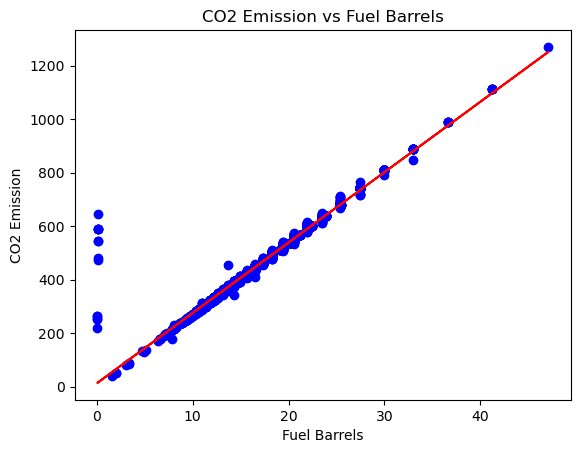

In [13]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('CO2 Emission vs Fuel Barrels')
plt.xlabel('Fuel Barrels')
plt.ylabel('CO2 Emission')
plt.show()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [16]:
import statsmodels.api as sm
summary = model.summary()
 

AttributeError: 'LinearRegression' object has no attribute 'summary'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
data = {'X' : [ 1,3,4,6,8,9,11,14],
      'Y' : [ 1,2,4,4,5,7,8,13]}
df = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<function matplotlib.pyplot.show(close=None, block=None)>

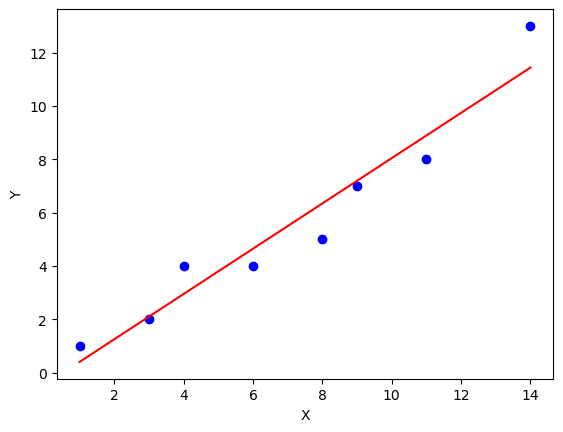

In [18]:
X = df['X'].values.reshape(-1, 1) 
Y = df['Y'].values
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plt.figure
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend
plt.show

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [19]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.84848485]
Intercept: -0.43939393939393767


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

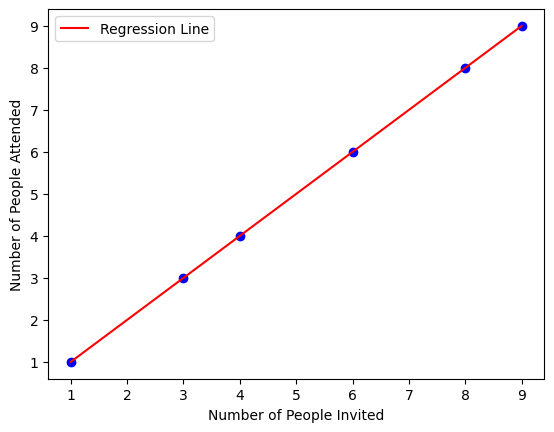

In [22]:
residuals = Y - Y_pred
outlier_threshold = 10
X_filtered = X[X < 11]
Y_filtered = X[X < 11 ]

X_filtered = X_filtered.reshape(-1, 1)
Y_filtered = Y_filtered.reshape(-1, 1)

model_filtered = LinearRegression()
model_filtered.fit(X_filtered, Y_filtered)
Y_pred_filtered = model_filtered.predict(X_filtered)


plt.scatter(X_filtered, Y_filtered, color='blue')
plt.plot(X_filtered, Y_pred_filtered, color='red', label='Regression Line')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.legend()
plt.show()



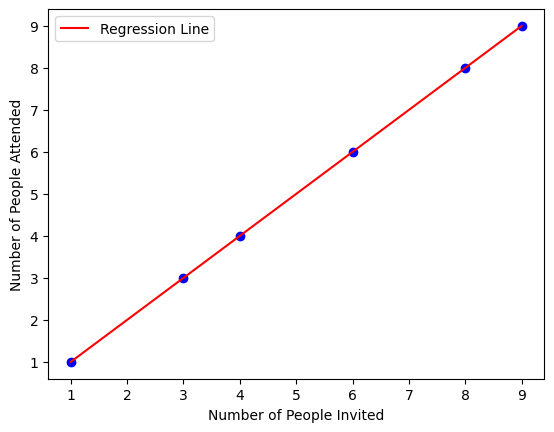

In [23]:
plt.scatter(X_filtered, Y_filtered, color='blue')
plt.plot(X_filtered, Y_pred_filtered, color='red', label='Regression Line')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.legend()
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Outlier is gone